In [80]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

Text(0, 0.5, 'y')

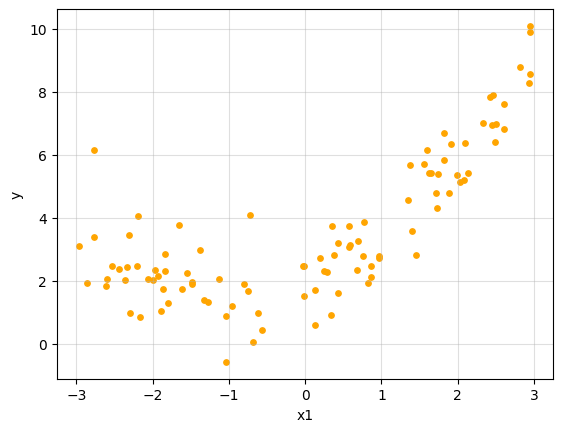

In [ ]:
m = 100
#non-linear data
x1 = 6 * np.random.rand(m,1) - 3 #vector 1x100
y = 0.5 * x1**2 + x1 + 2 + np.random.randn(m,1) #normal distibuition 

plt.scatter(x1,y,c="orange",s=15)
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

In [103]:
#polynomial features

poly_transform=PolynomialFeatures(degree=2,include_bias=False)
x1_poly=poly_transform.fit_transform(x1)
#y_poly = 0.5 * x1_poly**2 + x1_poly + 2 + np.random.randn(m,1)

print(x1[0],x1_poly[0])


[-2.77010615] [-2.77010615  7.6734881 ]


we basically apply a square on each feature using:
X + features**2

In [104]:
#using a linear model:
from sklearn.linear_model import LinearRegression

lin_regression=LinearRegression()
lin_regression.fit(x1_poly,y) #x plus its polinomial features


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'y')

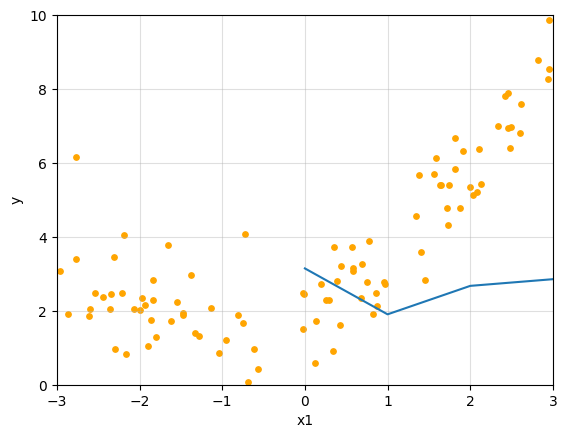

In [105]:

y_poly_predict = lin_regression.predict(x1_poly)


plt.scatter(x1,y,c="orange",s=15)
plt.plot(y_poly_predict)
plt.axis([-3,3,0,10])
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

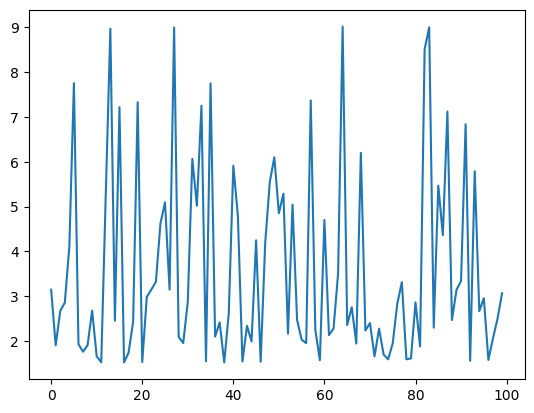

In [106]:
plt.plot(y_poly_predict)